## Análise Exploratória de Dados (EDA)

### Demanda de Energia Elétrica no Brasil

Este notebook tem como objetivo realizar a análise exploratória das séries temporais utilizadas no estudo, investigando padrões de tendência, sazonalidade, possíveis quebras estruturais visuais e relações preliminares entre as variáveis econômicas.

#### Perguntas que orientam a análise
* As séries possuem tendência de Longo Prazo? E os dados da demanda de energia elétrica industrial?

* Existem quebras Estruturais Econômicas que são visíveis nas séries? São compatíveis com as dummies?

* As variáveis se movem juntas, ou seja, a tendência é parecida?

* Há sazonalidade mensal da demanda de energia elétrica industrial?

* Existem outliers ou períodos atípicos?

In [45]:
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

### Bibliotecas de análise

In [46]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from src.config import DATA_PROCESSED, DATA_INTERIM, RESULTS_FIGURES, RESULTS_TABLES
# Configurações visuais
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

### Definição de PATH (Engenharia)

## Carregando os Dados

In [47]:
# Carregar base final processada
df = pd.read_csv(
    DATA_PROCESSED / "base_analitica.csv",
    parse_dates=["date"],
    index_col="date"
)

df.head()


,demanda_energia,tarifa_energia_real,pib_real,importacoes_petroleo,d_2001,d_2006,d_2008,d_2020
date,,,,,,,,
1997-01-01,9455000.0,467.377537,661215.689282,34.30,0,0,0,0
1997-02-01,9840000.0,450.907335,603200.965994,40.08,0,0,0,0
1997-03-01,9488000.0,458.226439,591156.246569,34.76,0,0,0,0
1997-04-01,9945000.0,458.327914,613668.044292,33.11,0,0,0,0
1997-05-01,10304000.0,514.755178,649538.842415,34.56,0,0,0,0


## Análise Exploratória dos Dados Não logaritimizados

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 346 entries, 1997-01-01 to 2025-10-01
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   demanda_energia       346 non-null    float64
 1   tarifa_energia_real   346 non-null    float64
 2   pib_real              346 non-null    float64
 3   importacoes_petroleo  346 non-null    float64
 4   d_2001                346 non-null    int64  
 5   d_2006                346 non-null    int64  
 6   d_2008                346 non-null    int64  
 7   d_2020                346 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.3 KB


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
demanda_energia,346.0,1.361196e+07,2.029521e+06,9.178000e+06,1.215025e+07,1.410100e+07,1.517950e+07,1.733300e+07
tarifa_energia_real,346.0,6.285230e+02,9.828101e+01,4.484424e+02,5.350756e+02,6.326112e+02,7.065680e+02,8.247335e+02
pib_real,346.0,8.243925e+05,1.579947e+05,5.360928e+05,6.567756e+05,8.462140e+05,9.738855e+05,1.103439e+06
importacoes_petroleo,346.0,8.819569e+01,4.124448e+01,1.730000e+01,5.007250e+01,8.865000e+01,1.148750e+02,1.830400e+02
d_2001,346.0,2.890173e-03,5.376033e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
d_2006,346.0,2.890173e-03,5.376033e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
d_2008,346.0,5.780347e-03,7.591833e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
d_2020,346.0,2.890173e-03,5.376033e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


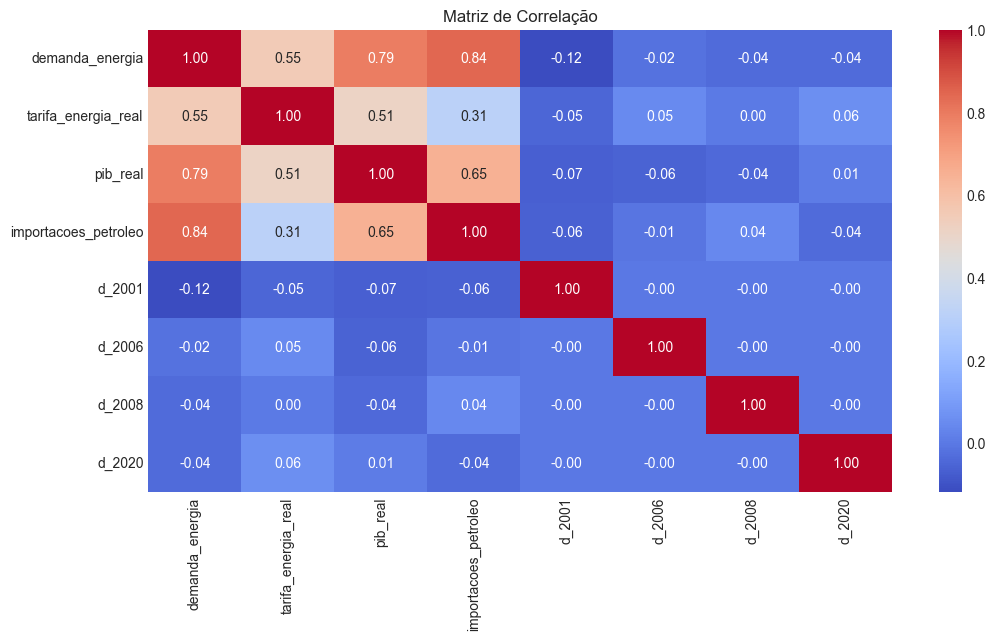

In [50]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()


## As séries de Dados Tem Tendência de Longo Prazo?

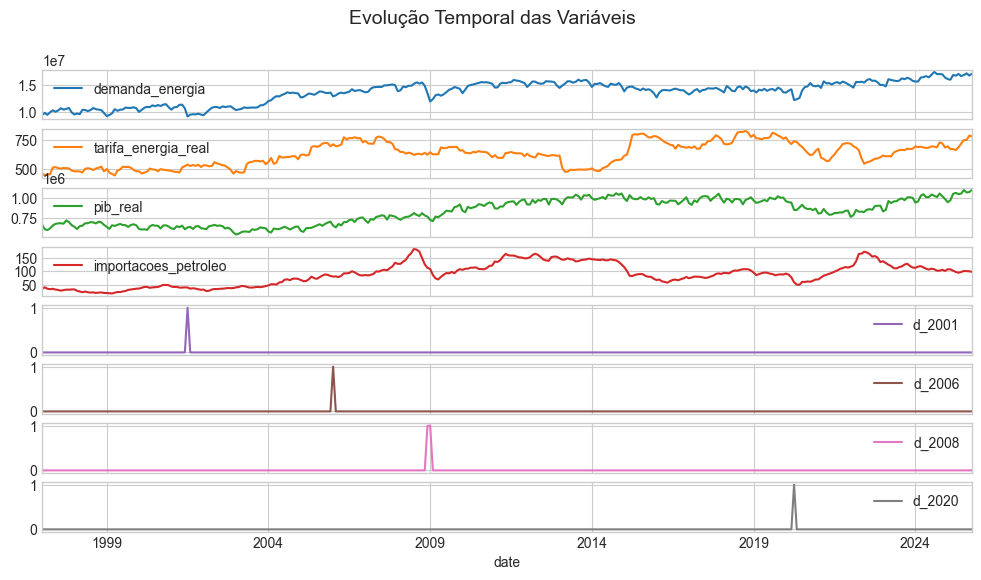

In [51]:
df.plot(subplots=True, layout=(df.shape[1], 1), sharex=True)
plt.suptitle("Evolução Temporal das Variáveis", fontsize=14)
plt.show()



------------------------------------------------------------------------------------
## RESPOSTA - As Séries Não Logaritimizadas possuem tendências de longo prazo?

* Demanda de Energia Elétrica - Sim
* Importações de Derivados do Petróleo - Possui oscilação, mas no longo prazo existe uma tendência positiva de crescimento.
* Tarifa de Energia Elétrica Industrial -  Sim, ao longo dos anos as Tarifa de Energia Elétrica do Setor Industrial estão em crescimento, tirando em alguns períodos que houveram intervenções e diminuição dessa Tarifa.
* PIB - Deflacionado - Sim, o PIB Têm uma tendência de crescimento de longo Prazo. 

----------------------------------------------------------------------------------------------
## PERGUNTA - Existem quebras Estruturais que são visíveis nas séries? Essas quebras estruturais podem ser incluídas como possíveis dummys?
---------------------------------------------------------------------------


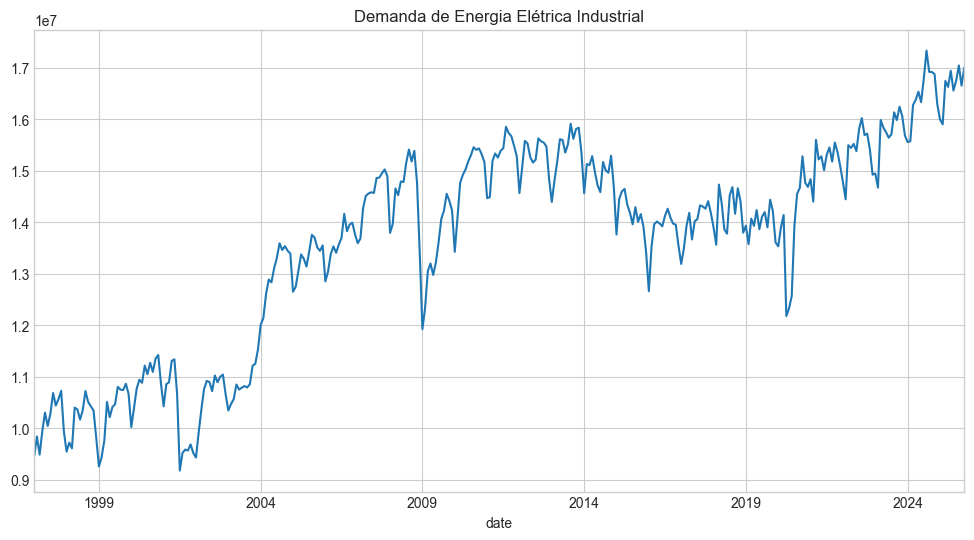

In [52]:
df["demanda_energia"].plot()
plt.title("Demanda de Energia Elétrica Industrial")
plt.show()

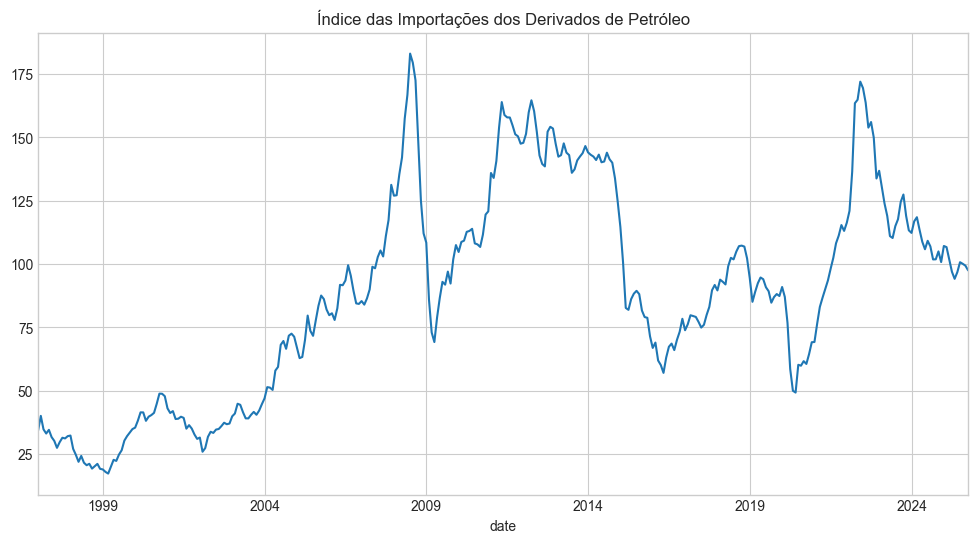

In [53]:
df["importacoes_petroleo"].plot()
plt.title("Índice das Importações dos Derivados de Petróleo")
plt.show()

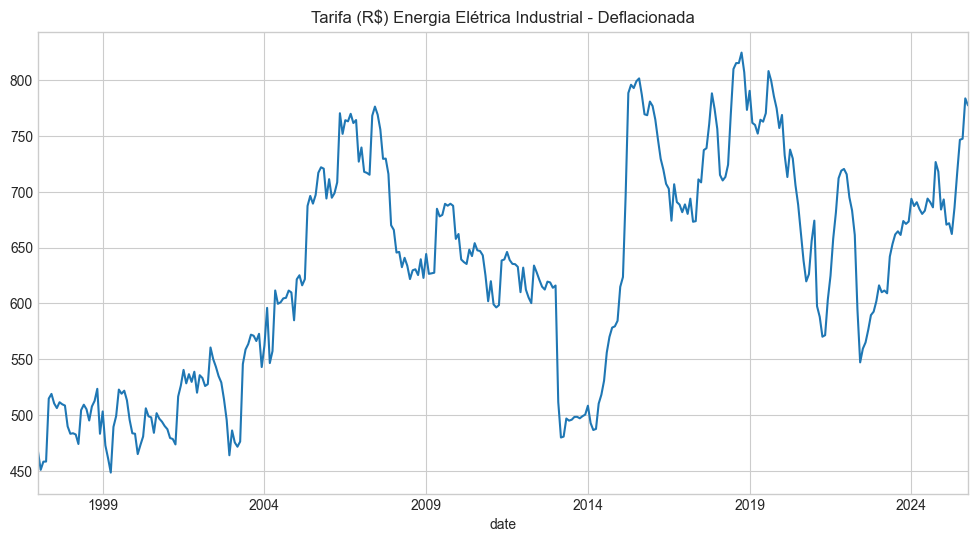

In [54]:
df["tarifa_energia_real"].plot()
plt.title("Tarifa (R$) Energia Elétrica Industrial - Deflacionada")
plt.show()

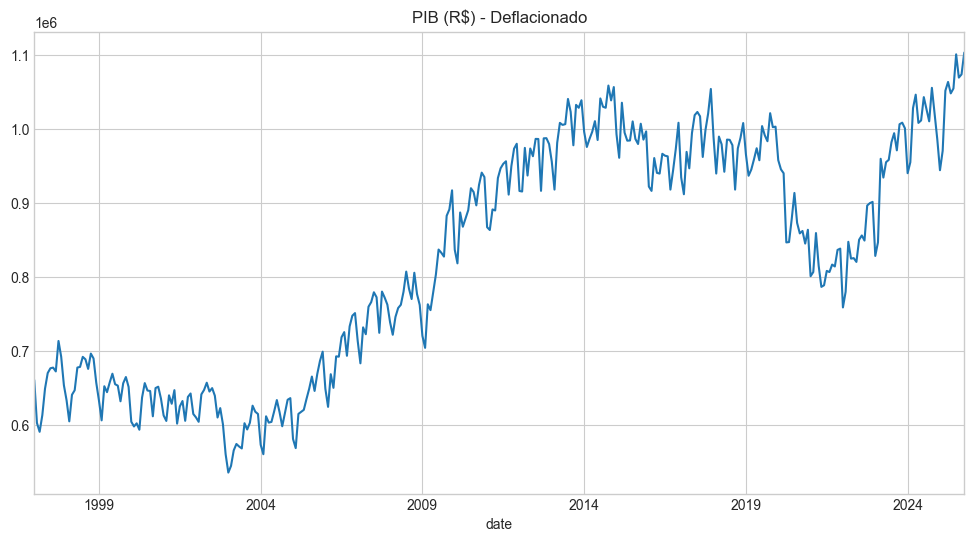

In [55]:
df["pib_real"].plot()
plt.title("PIB (R$) - Deflacionado")
plt.show()

----------------------------------------------------------------------------------------------
## Resposta - Existem quebras Estruturais que são visíveis nas séries? Essas quebras estruturais podem ser incluídas como possíveis dummys?

* Sim, existem! Os períodos analisados que podem ser quebras estruturais são:
* Apagão de 2001, que existiam possibilidades do Brasil inteiro ficar sem Luz.
* Erro Estatístico de 2006
* Crise Financeira de 2008 que teve impactos até início de 2009.
* Crise da Pandemia de 2019/2020. 
---------------------------------------------------------------------------


----------------------------------------------------------------------------------------------
## PERGUNTA -  Há sazonalidade mensal da demanda de energia elétrica industrial?
---------------------------------------------------------------------------


In [56]:
df.head()

,demanda_energia,tarifa_energia_real,pib_real,importacoes_petroleo,d_2001,d_2006,d_2008,d_2020
date,,,,,,,,
1997-01-01,9455000.0,467.377537,661215.689282,34.30,0,0,0,0
1997-02-01,9840000.0,450.907335,603200.965994,40.08,0,0,0,0
1997-03-01,9488000.0,458.226439,591156.246569,34.76,0,0,0,0
1997-04-01,9945000.0,458.327914,613668.044292,33.11,0,0,0,0
1997-05-01,10304000.0,514.755178,649538.842415,34.56,0,0,0,0


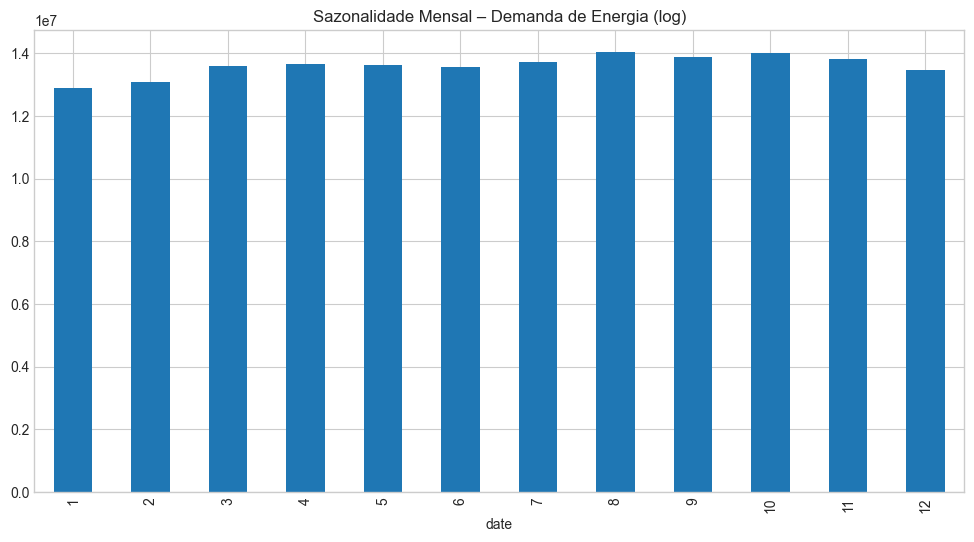

In [57]:
seasonal = (
    df
    .groupby(df.index.month)["demanda_energia"]
    .mean()
)
seasonal.plot(kind="bar")

plt.title("Sazonalidade Mensal – Demanda de Energia (log)")
plt.show()


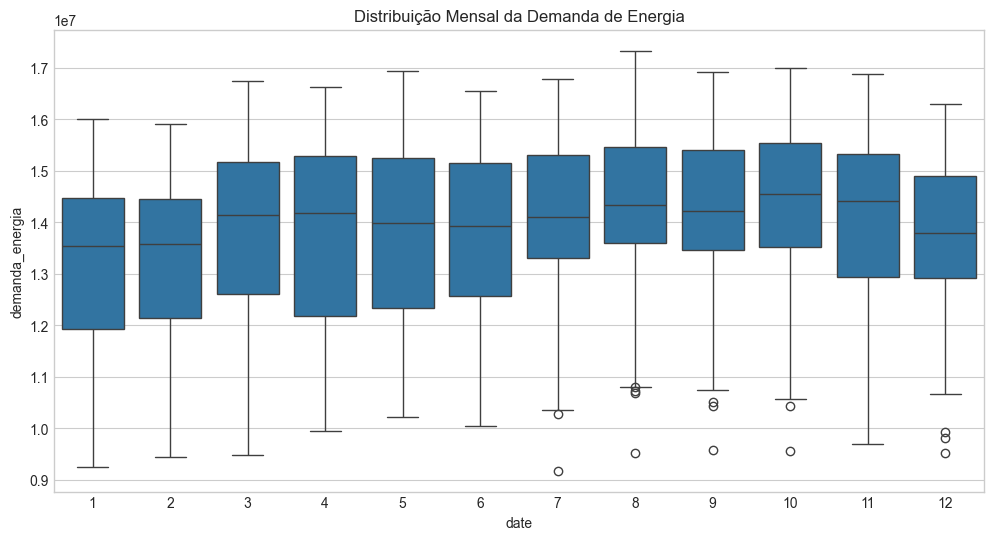

In [58]:
df["date"] = df.index.month

sns.boxplot(data=df, x="date", y="demanda_energia")
plt.title("Distribuição Mensal da Demanda de Energia")
plt.show()


----------------------------------------------------------------------------------------------
## Resposta - Há sazonalidade mensal da demanda de energia elétrica industrial?
* Sim, existem! Mas ela não é tão abrupta/relevante.
---------------------------------------------------------------------------

----------------------------------------------------------------------------------------------
## Análise Exploratória dos Dados Logaritimizados
---------------------------------------------------------------------------

In [59]:
log_vars = [
    "demanda_energia",
    "tarifa_energia_real",
    "pib_real",
    "importacoes_petroleo"
]

for var in log_vars:
    df[f"ln_{var}"] = np.log(df[var])


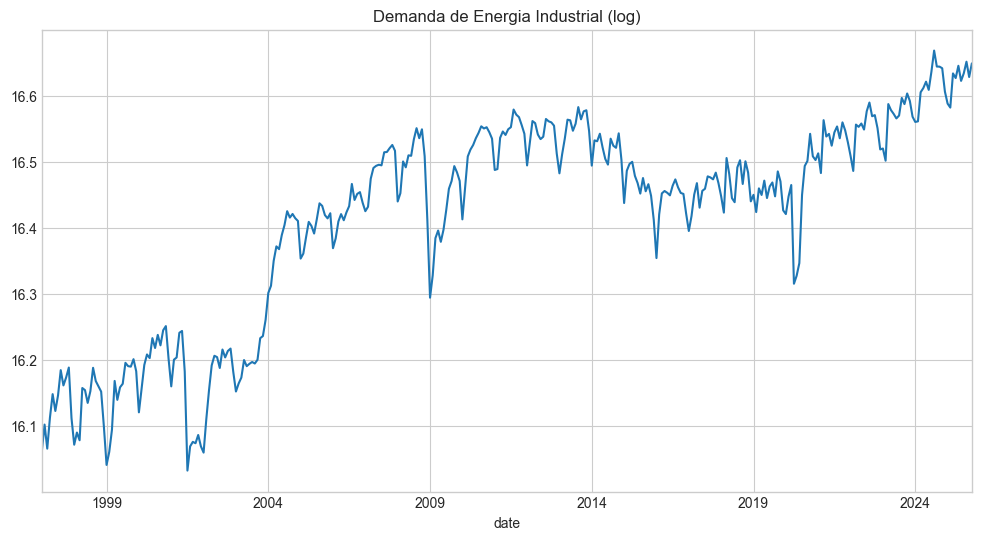

In [60]:
df["ln_demanda_energia"].plot()
plt.title("Demanda de Energia Industrial (log)")
plt.show()


In [61]:
corr = df[[f"ln_{v}" for v in log_vars]].corr()
corr

,ln_demanda_energia,ln_tarifa_energia_real,ln_pib_real,ln_importacoes_petroleo
ln_demanda_energia,1.000000,0.603087,0.796522,0.908516
ln_tarifa_energia_real,0.603087,1.000000,0.533957,0.504285
ln_pib_real,0.796522,0.533957,1.000000,0.702664
ln_importacoes_petroleo,0.908516,0.504285,0.702664,1.000000


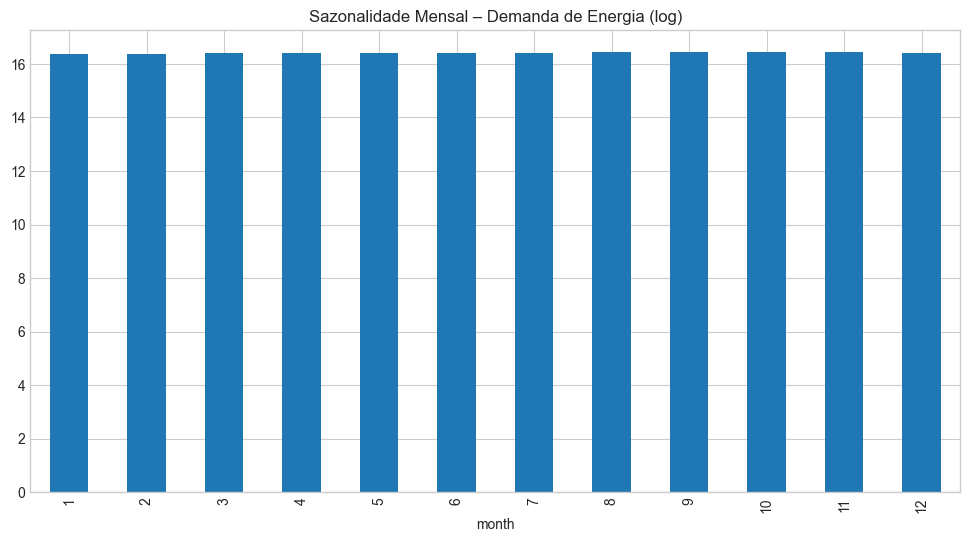

In [62]:
df["month"] = df.index.month

seasonal = df.groupby("month")["ln_demanda_energia"].mean()
seasonal.plot(kind="bar")

plt.title("Sazonalidade Mensal – Demanda de Energia (log)")
plt.show()


----------------------------------------------------------------------------------------------
# RESPOSTA FINAL - CONCLUSÕES DA ANÁLISE EXPLORATÓRIA DE DADOS (EDA)

* ### As séries de dados apresentam Tendência Positiva de Longo Prazo - Ou seja, Não são séries Estacionárias pela análise de gráfico
* ### A transformação Logarítmica estabiliza a variância da série
* ### Existêm indícios Visuais de Quebras estruturais em 2001, 2008/2009 e 2020
* ### A Demanda de Energia elétrica Industrial é positivamente correlacionada com o PIB o que faz sentido com a metodologia
* ### A Demanda de Energia elétrica Industrial não é inversamente correlacionada com a TARIFA de Energia o que levanta hipóteses de Multicolinearidade, Heterocedasticidade ou Autocorrelação
* ### A sazonalidade mensal da demanda de energia elétrica industrial parece ser muito pequena para ser significativamete representativa

---------------------------------------------------------------------------